# Task 4 - Principal component analysis

In [1]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt

from cv2 import resize

from pca import PCA

from pathlib import Path

%load_ext autoreload
%autoreload 2

In [2]:
data = Path('') / 'data'

## 1st Part - 2D Data

First, let's load and visualize the data:

In [3]:
twoDimsDataset = np.loadtxt(data / 'pca_dataset.txt', dtype = 'double')

In [4]:
print("Shape of the dataset: %s"%(str(twoDimsDataset.shape)))

Shape of the dataset: (100, 2)


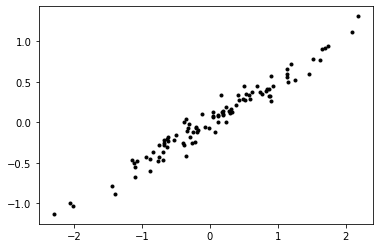

In [5]:
plt.plot(twoDimsDataset[:,0], twoDimsDataset[:,1], '.', color='black')

Now, let's perform PCA on the dataset:

In [6]:
pca = PCA()
pca.pca(twoDimsDataset)

Obtain the energy contained in each of the two components:

In [7]:
pca.getEnergyPerComponent()

array([0.99314266, 0.00685734])

Let's plot the dataset together with the direction of the two principal components:

In [8]:
components = pca.getComponents()
energy = pca.getEnergyPerComponent()

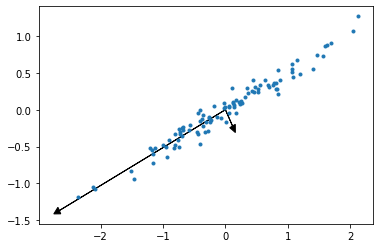

In [9]:
# PCA works with the centered data, so in order to obtain the directions
# we have to center the data
centered = twoDimsDataset - np.mean(twoDimsDataset, axis = 0)

# Plot the centered data
plt.plot(centered[:,0], centered[:,1], '.')

# Plot the directions of the two principal components
origin = [0, 0]
for vector, vectorEnergy in zip (components, energy):
    dest = vector * np.sqrt(vectorEnergy) * 3
    plt.arrow(origin[0], origin[0], dest[0], dest[1], head_width=0.1, head_length=0.1, color = 'black')

## 2nd Part - Image

Obtain and visualize the image:

In [10]:
# Obtain the grayscale image
img = scipy.misc.face(gray=True)

# Rescale to (249 x 185) #cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
img = resize(img, (249, 185))

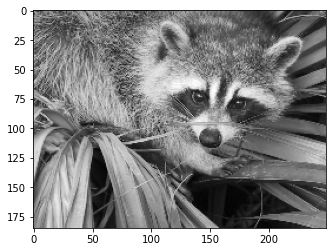

In [11]:
plt.imshow(img, cmap='gray')

In [12]:
pca = PCA()
pca.pca(img)

Let's reconstruct the image for different number of components:

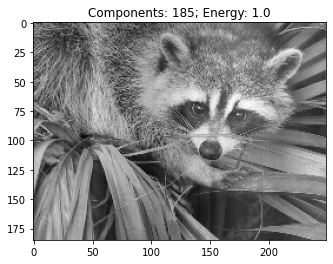

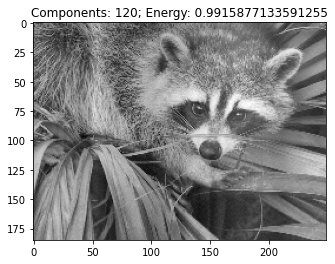

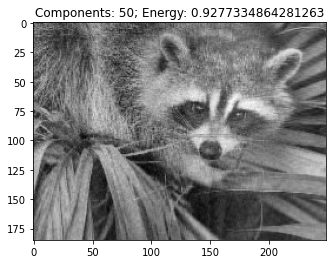

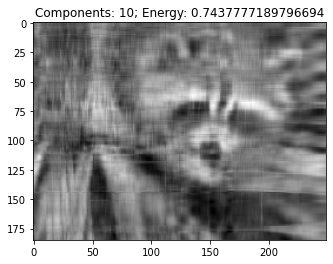

In [13]:
components = [185, 120, 50, 10]
for component in components:
    # Obtain reconstructed image and its captured energy
    reconstructed, energy = pca.getReconstructedData(nComponents = component)
    
    plt.title("Components: %s; Energy: %s"%(str(component), str(energy)))
    plt.imshow(reconstructed, cmap='gray')
    plt.show()

Plot the distribution of energy per component:

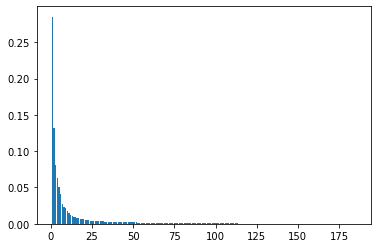

In [14]:
energies = pca.getEnergyPerComponent()
plt.bar([i for i in range(1, 186)], energies)
plt.show()

Let's see the accumulated energy per components:

In [15]:
sum = 0
for i in range(0, len(energies)):
    sum += energies[i]
    print("Energy until component %s = %s"%(str(i + 1), str(sum)))

Energy until component 1 = 0.28523824368879497
Energy until component 2 = 0.41664552757535145
Energy until component 3 = 0.49781889186168504
Energy until component 4 = 0.560486578254182
Energy until component 5 = 0.6115217469672412
Energy until component 6 = 0.6530261009003852
Energy until component 7 = 0.6799015009019846
Energy until component 8 = 0.7031757866739826
Energy until component 9 = 0.7255354524881479
Energy until component 10 = 0.7437777189796694
Energy until component 11 = 0.7588770379975236
Energy until component 12 = 0.7708612407151507
Energy until component 13 = 0.781162005675381
Energy until component 14 = 0.7902095192234954
Energy until component 15 = 0.7991529377109807
Energy until component 16 = 0.8073877458053516
Energy until component 17 = 0.8150347931430227
Energy until component 18 = 0.8222392666599596
Energy until component 19 = 0.8287172495306551
Energy until component 20 = 0.8349232140008673
Energy until component 21 = 0.8404797318982548
Energy until componen

## 3rd Part - Trajectories

Load the data of the pedestrian trajectories and plot them:

In [16]:
trajectories = np.loadtxt(data / 'data_DMAP_PCA_vadere.txt', dtype = 'double')
print("Shape of the dataset: %s"%(str(trajectories.shape)))

Shape of the dataset: (1000, 30)


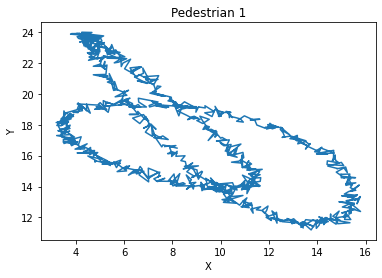

In [17]:
plt.title("Pedestrian 1")
plt.plot(trajectories[:, 0], trajectories[:, 1]);
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

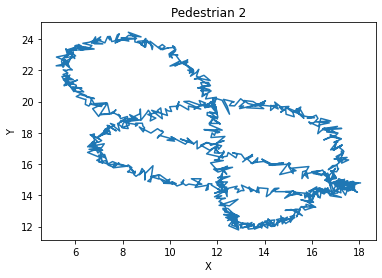

In [18]:
plt.title("Pedestrian 2")
plt.plot(trajectories[:, 2], trajectories[:, 3]);
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Perform the PCA:

In [19]:
pca = PCA()
pca.pca(trajectories)

Let's analyze the data set by projecting the 30-dimensional data points to the first two principal components:

In [20]:
nComponents = 2

In [21]:
reconstructed, energy = pca.getReconstructedData(nComponents = nComponents)

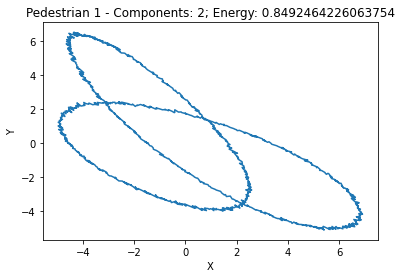

In [22]:
plt.title("Pedestrian 1 - Components: %s; Energy: %s"%(str(nComponents), str(energy)))
plt.plot(reconstructed[:, 0], reconstructed[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

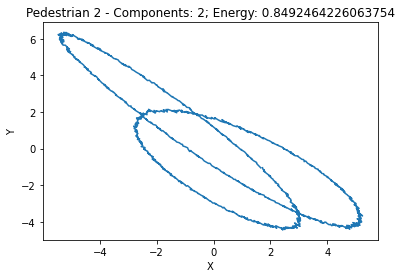

In [23]:
plt.title("Pedestrian 2 - Components: %s; Energy: %s"%(str(nComponents), str(energy)))
plt.plot(reconstructed[:, 2], reconstructed[:, 3])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We can se that with 2 principal components we can not capture most of the energy (> 90%). Let's try with 3 principal components:

In [24]:
nComponents = 3

In [25]:
reconstructed, energy = pca.getReconstructedData(nComponents = nComponents)

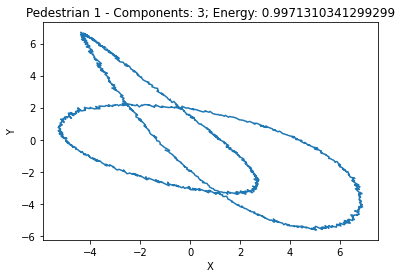

In [26]:
plt.title("Pedestrian 1 - Components: %s; Energy: %s"%(str(nComponents), str(energy)))
plt.plot(reconstructed[:, 0], reconstructed[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

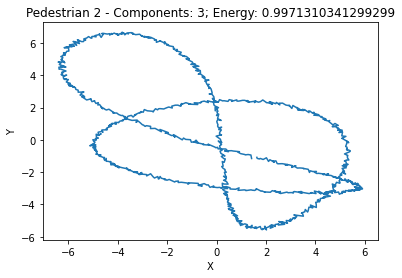

In [27]:
plt.title("Pedestrian 2 - Components: %s; Energy: %s"%(str(nComponents), str(energy)))
plt.plot(reconstructed[:, 2], reconstructed[:, 3])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

With 3 components we capture most of the energy because we capture 99,7%.